<a href="https://colab.research.google.com/github/fansha1994/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS18_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

![Sample variance and standard deviation](https://lh3.googleusercontent.com/proxy/Gz88uLtrtjm90TIaq8Kf82aOru1A8aHRzVDF6aZzWd6oDKhPhsjlZZRNZrwmlRd8eH5nnEFBf2m3l_GBwFwZmmOBG6MfngDmbMrGKFRWvqcf)

In [44]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean_var_std(data):
#calculate the mean 
  mean = sum(data)/len(data)
#calculate the v  
  n = len(data)
  variance = sum([(mean-i)**2 for i in data])/ n
# calculate the standard deviation
  std = (sum([(mean - i)**2 for i in data])/n)**0.5
  
  return mean, variance, std
mean, variance, std = mean_var_std(sales)
print('The mean is:', mean)
print('The variance is:', variance)
print('The standard deviation is:', std)


The mean is: 3052.714285714286
The variance is: 183761.06122448976
The standard deviation is: 428.67360686714756


In [45]:
# use numpy functions to make sure we got it right 
print('The mean is: ', np.mean(sales))
print('The variance is: ', np.var(sales))
print('The standard deviation is: ', np.std(sales))


The mean is:  3052.714285714286
The variance is:  183761.06122448976
The standard deviation is:  428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [47]:
customers = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, customers, ddof=0)[0][1]

covariance

6518.020408163265

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [66]:
df = pd.DataFrame({'customers': [127, 80, 105, 92, 120, 115, 93],
                   'sales':[3505, 2400, 3027, 2798, 3700, 3250, 2689]})
                
df.head()

,customers,sales
0,127,3505
1,80,2400
2,105,3027
3,92,2798
4,120,3700


In [56]:
mean_customers, var_customers, std_customers = mean_var_std(customers)
mean_sales, variance_sales, std_sales = mean_var_std(sales)

# by using the fot loop in the previous code

print('The standard deviation of customers is:',std_customers)
print('The correlation coefficient is:', np.corrcoef(sales,customers)[0][1])


The standard deviation of customers is: 15.792015549069118
The correlation coefficient is: 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [6]:
# we call "inclube='number'" to show only numeric data
df_numbers = df.describe(include='number')
df_numbers.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000


In [7]:
df_numbers.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,222619.376618,113670.521981,113673.587336,119807.261430,114254.391568,114310.068252,156045.054776,38593.360607,113724.553240
pclass,113670.521981,213479.005246,213764.623141,209113.551610,213586.310279,213593.107238,198533.337197,-5144.607848,213956.454425
survived,113673.587336,213764.623141,214051.238200,209385.622396,213872.545845,213879.319262,198786.918274,-5186.507839,214243.352198
age,119807.261430,209113.551610,209385.622396,205347.697720,209258.916720,209272.403823,197951.951491,-2909.785382,209573.076047
sibsp,114254.391568,213586.310279,213872.545845,209258.916720,213699.848343,213707.645604,199035.510455,-5011.315096,214064.682635
parch,114310.068252,213593.107238,213879.319262,209272.403823,213707.645604,213715.733360,199112.531235,-4999.933352,214071.602009
fare,156045.054776,198533.337197,198786.918274,197951.951491,199035.510455,199112.531235,214095.419689,7966.671642,198975.927540
body,38593.360607,-5144.607848,-5186.507839,-2909.785382,-5011.315096,-4999.933352,7966.671642,10702.064223,-5205.560294
has_cabin_number,113724.553240,213956.454425,214243.352198,209573.076047,214064.682635,214071.602009,198975.927540,-5205.560294,214435.755182


In [8]:
df_numbers.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.521421,0.520738,0.560347,0.523829,0.524065,0.714768,0.790674,0.520504
pclass,0.521421,1.000000,0.999999,0.998757,0.999986,0.999980,0.928650,-0.107632,0.999998
survived,0.520738,0.999999,1.000000,0.998718,0.999986,0.999981,0.928593,-0.108363,1.000000
age,0.560347,0.998757,0.998718,1.000000,0.998934,0.998962,0.944085,-0.062070,0.998716
sibsp,0.523829,0.999986,0.999986,0.998934,1.000000,0.999999,0.930518,-0.104789,0.999987
parch,0.524065,0.999980,0.999981,0.998962,0.999999,1.000000,0.930843,-0.104547,0.999982
fare,0.714768,0.928650,0.928593,0.944085,0.930518,0.930843,1.000000,0.166433,0.928642
body,0.790674,-0.107632,-0.108363,-0.062070,-0.104789,-0.104547,0.166433,1.000000,-0.108664
has_cabin_number,0.520504,0.999998,1.000000,0.998716,0.999987,0.999982,0.928642,-0.108664,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

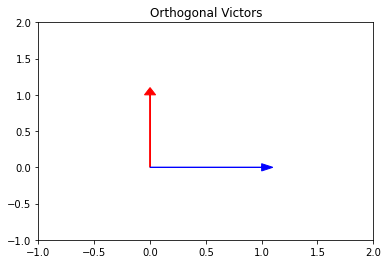

0

In [12]:
a = [0,1]
b = [1,0]

plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.title('Orthogonal Victors')
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [11]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

 - **Their not because their dot is -40**
 - **To be orthogonal victors their dot should be 0**

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
c = np.array([2,-15,6,20])

c_norm = (np.linalg.norm(c))**2
c_norm


665.0

In [14]:
c_c = np.dot(c,c)

c_c

665

In [15]:
c_T_c = (c.T)*c

c_T_c

array([  4, 225,  36, 400])

- ## $||c||^2$ = $c \cdot c$
- ## $c^{T}c$ = $c^2$


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align} c= 7\hat{i} + 12\hat{j} \end{align}


\begin{align} d= 2\hat{i} + 11\hat{j} + -8\hat{k} \end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [17]:
f = [4, 12, 11, 9, 2]

f_norm = np.linalg.norm(f)
f_unit_vector = np.multiply(f,1/f_norm)
print(f_unit_vector)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

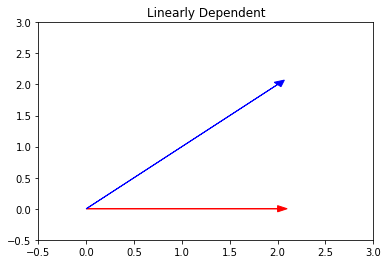

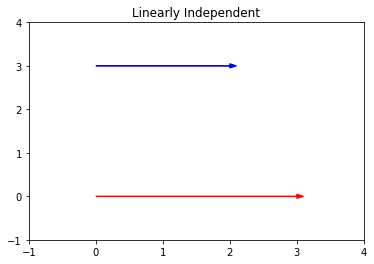

In [22]:
a = [2,0]
b = [2,2]
c = [3,0]
d = [2,0]

f1 = plt.figure(1)
plt.arrow(0,0, a[0],a[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,0, b[0],b[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)
plt.title('Linearly Dependent')

f2 = plt.figure(2)
plt.arrow(0,0, c[0],c[1], head_width = 0.1, head_length = 0.1, color = 'red')
plt.arrow(0,3, d[0],d[1], head_width = 0.1, head_length = 0.1, color = 'blue')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title('Linearly Independent')
plt.show()



# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [27]:
g = [1, 2]
h = [4, 8] 
gh_matrix = np.matrix([g,h])


np.linalg.matrix_rank(gh_matrix)
print('The span D is ', np.linalg.matrix_rank(gh_matrix))


The span D is  1


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [43]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

lmn_matrix = np.matrix([l,m,n])


np.linalg.matrix_rank(lmn_matrix)
print('The span D is ', np.linalg.matrix_rank(lmn_matrix))


The span D is  3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



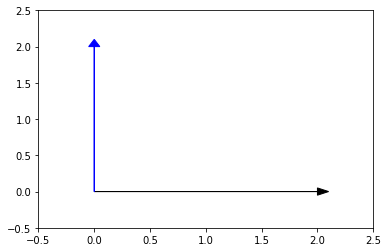

In [33]:
a = [2,0]
b = [0,2]

f = plt.figure(1)
plt.arrow(0,0, a[0], a[1], head_width= 0.1, head_length= 0.1, color= 'black')
plt.arrow(0,0, b[0], b[1], head_width= 0.1, head_length= 0.1, color= 'blue')
plt.xlim(-0.5,2.5)
plt.ylim(-0.5,2.5)
plt.show()

## 6.2 What does it mean to form a basis?

- ## It means that the vectors are linearly independent and they span vector space V

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [35]:
p = np.array([[1,2,3],
     [-1,0,7],
     [4,8,2]])

print('The rank of p is:', np.linalg.matrix_rank(P))

The rank of p is: 3


## 7.2 What does the rank of a matrix tell us?

- ## The rank of the matrix is the maximum number of linearly independent column or rows vectors in the matrix

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

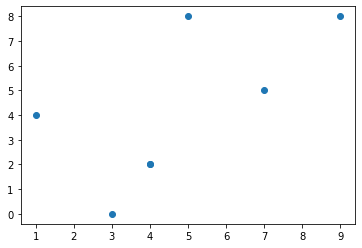

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)